In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
#导入数据
DAU=pd.read_csv("C:\\Users\\yzf\\Downloads\\DL76333\\R\\section3-dau.csv",engine='python')
DPU=pd.read_csv("C:\\Users\\yzf\\Downloads\\DL76333\\R\\section3-dpu.csv",engine='python')
INSTALL=pd.read_csv("C:\\Users\\yzf\\Downloads\\DL76333\\R\\section3-install.csv",engine='python')

In [20]:
#DAU数据概览
DAU.info()
DAU.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139112 entries, 0 to 139111
Data columns (total 3 columns):
log_date    139112 non-null object
app_name    139112 non-null object
user_id     139112 non-null int64
dtypes: int64(1), object(2)
memory usage: 3.2+ MB


,log_date,app_name,user_id
0,2013-06-01,game-01,116
1,2013-06-01,game-01,13491
2,2013-06-01,game-01,7006
3,2013-06-01,game-01,117
4,2013-06-01,game-01,13492


In [21]:
#DPU数据概览
DPU.info()
DPU.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884 entries, 0 to 883
Data columns (total 4 columns):
log_date    884 non-null object
app_name    884 non-null object
user_id     884 non-null int64
payment     884 non-null int64
dtypes: int64(2), object(2)
memory usage: 27.7+ KB


,log_date,app_name,user_id,payment
0,2013-06-01,game-01,351,1333
1,2013-06-01,game-01,12796,81
2,2013-06-01,game-01,364,571
3,2013-06-01,game-01,13212,648
4,2013-06-01,game-01,13212,1142


In [22]:
#INSTALL数据概览
INSTALL.info()
INSTALL.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29330 entries, 0 to 29329
Data columns (total 3 columns):
install_date    29330 non-null object
app_name        29330 non-null object
user_id         29330 non-null int64
dtypes: int64(1), object(2)
memory usage: 687.5+ KB


,install_date,app_name,user_id
0,2013-04-15,game-01,1
1,2013-04-15,game-01,2
2,2013-04-15,game-01,3
3,2013-04-15,game-01,4
4,2013-04-15,game-01,5


In [28]:
#合并数据
data_total=pd.merge(DAU,INSTALL,on='user_id')
data_total=pd.merge(data_total,DPU,how='outer',on=['user_id', 'log_date'])

In [29]:
#合并后数据概览
data_total.info()
data_total.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139295 entries, 0 to 139294
Data columns (total 7 columns):
log_date        139295 non-null object
app_name_x      139295 non-null object
user_id         139295 non-null int64
install_date    139295 non-null object
app_name_y      139295 non-null object
app_name        884 non-null object
payment         884 non-null float64
dtypes: float64(1), int64(1), object(5)
memory usage: 8.5+ MB


,log_date,app_name_x,user_id,install_date,app_name_y,app_name,payment
0,2013-06-01,game-01,116,2013-04-17,game-01,NaN,NaN
1,2013-06-02,game-01,116,2013-04-17,game-01,NaN,NaN
2,2013-06-03,game-01,116,2013-04-17,game-01,NaN,NaN
3,2013-06-04,game-01,116,2013-04-17,game-01,NaN,NaN
4,2013-06-05,game-01,116,2013-04-17,game-01,NaN,NaN


In [30]:
#替换缺失值
data_total.fillna(value=0,inplace=True)
data_total.info()
data_total.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139295 entries, 0 to 139294
Data columns (total 7 columns):
log_date        139295 non-null object
app_name_x      139295 non-null object
user_id         139295 non-null int64
install_date    139295 non-null object
app_name_y      139295 non-null object
app_name        139295 non-null object
payment         139295 non-null float64
dtypes: float64(1), int64(1), object(5)
memory usage: 8.5+ MB


,log_date,app_name_x,user_id,install_date,app_name_y,app_name,payment
0,2013-06-01,game-01,116,2013-04-17,game-01,0,0.0
1,2013-06-02,game-01,116,2013-04-17,game-01,0,0.0
2,2013-06-03,game-01,116,2013-04-17,game-01,0,0.0
3,2013-06-04,game-01,116,2013-04-17,game-01,0,0.0
4,2013-06-05,game-01,116,2013-04-17,game-01,0,0.0


In [32]:
#删除多余列
data_total.drop(columns=['app_name_y','app_name'],inplace=True)
data_total.head()

,log_date,app_name_x,user_id,install_date,payment
0,2013-06-01,game-01,116,2013-04-17,0.0
1,2013-06-02,game-01,116,2013-04-17,0.0
2,2013-06-03,game-01,116,2013-04-17,0.0
3,2013-06-04,game-01,116,2013-04-17,0.0
4,2013-06-05,game-01,116,2013-04-17,0.0


In [42]:
#日期数据转换为月份
data_total['log_date']=data_total.log_date.map(lambda x: pd.to_datetime(x).strftime('%Y-%m'))
data_total['install_date']=data_total.install_date.map(lambda x: pd.to_datetime(x).strftime('%Y-%m'))

In [45]:
data_total.head()

,log_date,app_name_x,user_id,install_date,payment
0,2013-06,game-01,116,2013-04,0.0
1,2013-06,game-01,116,2013-04,0.0
2,2013-06,game-01,116,2013-04,0.0
3,2013-06,game-01,116,2013-04,0.0
4,2013-06,game-01,116,2013-04,0.0


In [52]:
#按月聚合统计每位用户的月消费总额
data_mon_total=data_total.groupby(['log_date','user_id','install_date'])['payment'].agg('sum')
data_mon_total=data_mon_total.reset_index()
data_mon_total.head()

,log_date,user_id,install_date,payment
0,2013-06,1,2013-04,0.0
1,2013-06,2,2013-04,0.0
2,2013-06,3,2013-04,14994.0
3,2013-06,4,2013-04,0.0
4,2013-06,6,2013-04,0.0


In [61]:
#新增一列表示是否为新用户，0表示老用户，1表示新用户
data_mon_total['user_type']=data_mon_total.apply(lambda x:'1' if x.log_date == x.install_date else '0', axis=1)
data_mon_total.head()

,log_date,user_id,install_date,payment,user_type
0,2013-06,1,2013-04,0.0,0
1,2013-06,2,2013-04,0.0,0
2,2013-06,3,2013-04,14994.0,0
3,2013-06,4,2013-04,0.0,0
4,2013-06,6,2013-04,0.0,0


In [69]:
#按月统计新用户和老用户的消费总额
data_mon_payment=data_mon_total.groupby(['log_date','user_type'])['payment'].agg('sum')
data_mon_payment=data_mon_payment.reset_index()
result=pd.pivot_table(data_mon_payment,values='payment',index='user_type',columns='log_date',aggfunc='sum')
result.index=('老用户','新用户')
result

log_date,2013-06,2013-07
老用户,177886.0,177886.0
新用户,49837.0,29199.0


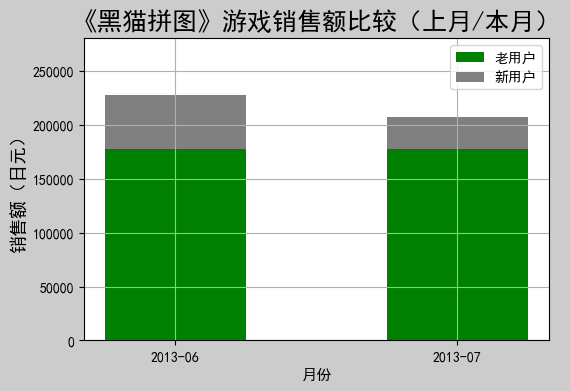

In [91]:
#数据可视化
x=list(result.columns)
y1=list(result.loc['老用户',:])
y2=list(result.loc['新用户',:])
plt.figure(dpi=100, facecolor='0.8')
plt.bar(x,y1,width=0.5,color='green')
plt.bar(x,y2,width=0.5,color='grey',bottom=y1)
plt.ylim(0, 280000)
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.title('《黑猫拼图》游戏销售额比较（上月/本月）',fontsize=18)
plt.legend(['老用户','新用户'],loc='upper right',fontsize=10)
plt.xlabel('月份', fontsize=11)
plt.ylabel('销售额（日元）', fontsize=13)
plt.grid(True)
plt.show()

In [100]:
mau_payment_new=data_mon_total[data_mon_total.user_type=='1']
mau_payment_new.head()

,log_date,user_id,install_date,payment,user_type
5598,2013-06,13491,2013-06,0.0,1
5599,2013-06,13492,2013-06,0.0,1
5600,2013-06,13493,2013-06,0.0,1
5601,2013-06,13494,2013-06,0.0,1
5602,2013-06,13495,2013-06,0.0,1


In [103]:
payment_min = mau_payment_new.payment.min()
payment_max = mau_payment_new.payment.max()
mau_payment_new['payment_group'] = pd.cut(mau_payment_new.payment, 
                                          bins=[payment_min-1, 1000, 2000, 3000, 4000, 5000, 6000, 7000, payment_max+1],
                                          labels=['1000日元以下', '1000-2000日元', '2000-3000日元', '3000-4000日元', '4000-5000日元', '5000-6000日元', '6000-7000日元', '7000日元以上'])

In [115]:
new_payment_group =pd.pivot_table(mau_payment_new,values='user_id',index='payment_group',columns='log_date',aggfunc='count')
new_payment_group

log_date,2013-06,2013-07
payment_group,,
1000日元以下,37.0,34.0
1000-2000日元,6.0,2.0
2000-3000日元,1.0,1.0
3000-4000日元,1.0,NaN
4000-5000日元,NaN,1.0
5000-6000日元,1.0,NaN
6000-7000日元,1.0,NaN
7000日元以上,1.0,1.0


In [116]:
new_payment_group.fillna(value=0,inplace=True)

In [117]:
new_payment_group

log_date,2013-06,2013-07
payment_group,,
1000日元以下,37.0,34.0
1000-2000日元,6.0,2.0
2000-3000日元,1.0,1.0
3000-4000日元,1.0,0.0
4000-5000日元,0.0,1.0
5000-6000日元,1.0,0.0
6000-7000日元,1.0,0.0
7000日元以上,1.0,1.0


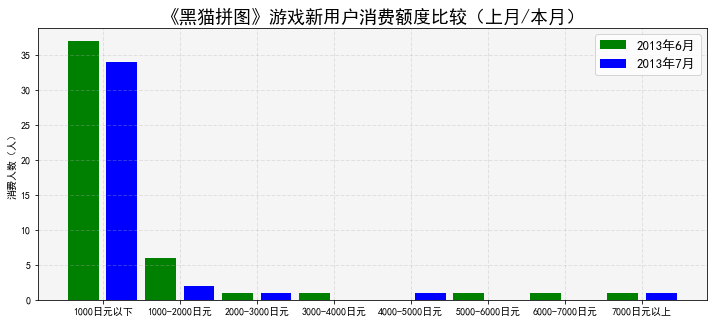

In [118]:
#数据可视化
width = new_payment_group.columns.size
index = np.arange(0, new_payment_group.index.size)
color = ['green', 'blue']
labels = ['2013年6月', '2013年7月']
plt.figure(figsize=(12, 5))
plt.gca().set_facecolor('whitesmoke')
for i in range(0, width):
    sub = new_payment_group.iloc[:, i]
    plt.bar(index*width+i, sub, color=color[i], label=labels[i], width=0.8)

plt.title('《黑猫拼图》游戏新用户消费额度比较（上月/本月）', fontsize=18)
plt.xticks(index*width+0.5, new_payment_group.index)
plt.ylabel('消费人数（人）')
plt.legend(fontsize=13)
plt.grid(linestyle='--', linewidth=1, alpha=0.3)
plt.show()